In [46]:
!pip install arabic_reshaper
!pip install python-bidi
!pip install convertdate

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import random
import arabic_reshaper
from bidi.algorithm import get_display
from convertdate import persian

In [79]:
data = pd.read_csv(r'E:\learning\data visulization\homeworks\hw1/total-cancer-deaths-by-type.csv', usecols=[0,*range(2, 30)])
irand_data = data.loc[data['Entity'].isin(['Iran'])]

irand_data = irand_data.rename(columns={"Liver cancer (deaths)": "کبد", "Kidney cancer (deaths)": "کلیه", "Larynx cancer (deaths)": "حنجره"
                  , "Breast cancer (deaths)": "سینه", "Thyroid cancer (deaths)": "تیرویید", "Stomach cancer (deaths)": "معده"
                  , "Bladder cancer (deaths)": "مثانه", "Uterine cancer (deaths)": "رحم", "Ovarian cancer (deaths)": "تخمدان"
                  , "Cervical cancer (deaths)": "دهانه رحم", "Prostate cancer (deaths)": "پروستات", "Pancreatic cancer (deaths)": "پانکراس"
                  , "Esophageal cancer (deaths)": "مری", "Testicular cancer (deaths)": "بیضه", "Nasopharynx cancer (deaths)": "گلو"
                  , "Other pharynx cancer (deaths)": "سایر حلق", "Colon and rectum cancer (deaths)": "روده بزرگ", "Non-melanoma skin cancer (deaths)": "پوست"
                  , "Lip and oral cavity cancer (deaths)": "لب و دهن", "Brain and nervous system cancer (deaths)": "مغز وسیستم عصبی", "Tracheal, bronchus, and lung cancer (deaths)": "ریه و برونشیت"
                  , "Gallbladder and biliary tract cancer (deaths)": "کیسه صفرا", "Malignant skin melanoma (deaths)": "پوست سیاه", "Leukemia (deaths)": "خون"
                  , "Hodgkin lymphoma (deaths)": "لنفوم هاجکین", "Multiple myeloma (deaths)": "مولتیپل میلوما", "Other cancers (deaths)": "سایر"})

irand_data = irand_data.melt(id_vars=['Entity', 'Year'],var_name='cancer_type')
# irand_data['cancer_type'] = irand_data['cancer_type'].str[:10]

In [86]:
color = []
for i in range(0,27):
  r = lambda: random.randint(0,255)
  color.append('#%02X%02X%02X' % (r(),r(),r()))

colors = dict(zip(irand_data['cancer_type'].unique(),color))

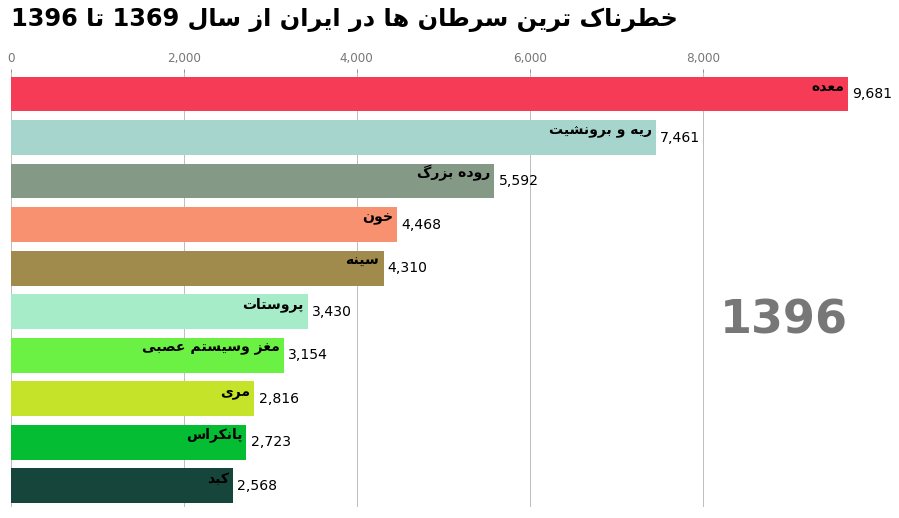

In [87]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = irand_data[irand_data['Year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['cancer_type'], dff['value'], color=[colors[x] for x in dff['cancer_type']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['cancer_type'])):
        ax.text(value-dx, i,get_display(arabic_reshaper.reshape(name)), size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, persian.from_gregorian(current_year, 10, 31)[0], transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, get_display(arabic_reshaper.reshape('خطرناک ترین سرطان ها در ایران از سال 1369 تا 1396')),
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)
    
draw_barchart(2017)

MovieWriter imagemagick unavailable.


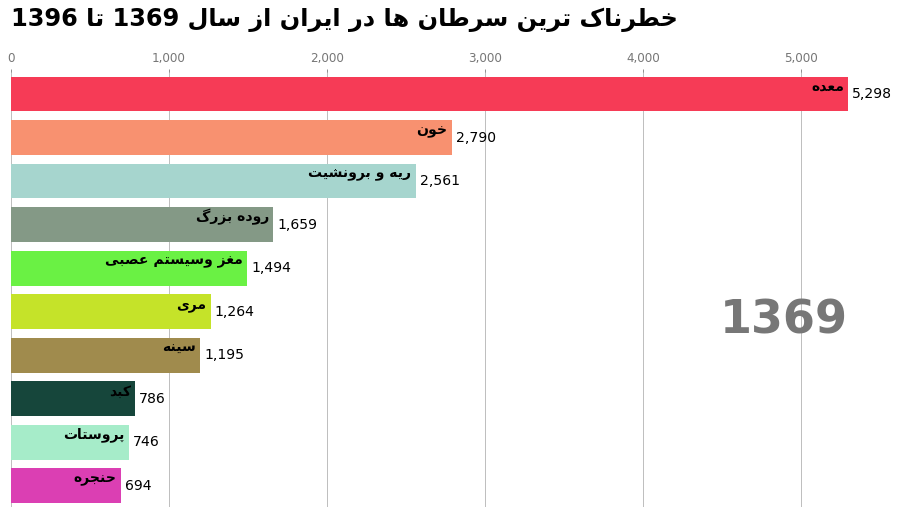

In [88]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1990, 2018),interval=800)
animator.save('Iran_cancer.gif', writer='imagemagick', fps=3000)
HTML(animator.to_jshtml())